In [35]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely
!pip install chart-studio

     |████████████████████████████████| 64 kB 897 kB/s eta 0:00:011


In [37]:
import plotly.figure_factory as ff
import geopandas as gp
import numpy as np
import pandas as pd
import plotly.offline as py
from chart_studio.plotly import plot, iplot


In [46]:
# https://chart-studio.plotly.com/~jackp/18292/plotting-d3js-county-choropleth-maps-in/#/
# df = gp.read_file("/Users/jackparmer/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")

df = gp.read_file('Resources/cb_2018_us_zcta510_500k.shp')

In [45]:
df.tail
df.dtypes

ZCTA5CE10     object
AFFGEOID10    object
GEOID10       object
ALAND10        int64
AWATER10       int64
geometry      object
dtype: object

In [5]:
type(df["geometry"])

geopandas.geoseries.GeoSeries

In [31]:
x,y=df['geometry'][3].exterior.xy

Polygon


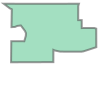

In [30]:
print(df['geometry'][24].type)
df['geometry'][24]

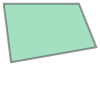

In [28]:
df['geometry'][24].simplify(0.2)

In [32]:
df['geometry'][18].exterior.xy[1][0]

33.302729

In [33]:
# Center Point
df['geometry'][24].centroid.xy

(array('d', [-88.41944909283772]), array('d', [42.45620838199368]))

In [39]:
plot_data = []
for index,row in df.iterrows():
    if df['geometry'][index].type == 'Polygon':
        x,y = row.geometry.exterior.xy
        c_x,c_y = row.geometry.centroid.xy
    elif df['geometry'][index].type == 'MultiPolygon':
        x = [poly.exterior.xy[0] for poly in df['geometry'][index]]
        y = [poly.exterior.xy[1] for poly in df['geometry'][index]]
        x_c = [poly.centroid.xy[0] for poly in df['geometry'][index]]
        y_c = [poly.centroid.xy[1] for poly in df['geometry'][index]]        
    else: 
        print('stop')
    county_outline = dict(
            type = 'scatter',
            showlegend = False,
            legendgroup = "shapes",
            line = dict(color='black', width=1),
            x=x,
            y=y,
            fill='toself',
            fillcolor = 'purple',
            hoverinfo='none'
    )
    hover_point = dict(
            type = 'scatter',
            showlegend = False,
            legendgroup = "centroids",
            zipcode = row.ZCTA5CE10,
            marker = dict(size=2),
            x=c_x,
            y=c_y,
            fill='toself',
            fillcolor = 'purple'            
    )
    plot_data.append(county_outline)
    plot_data.append(hover_point)

NameError: name 'c_x' is not defined

In [9]:
# Created Pandas DataFrame to rename (ZCTA5CE10 as Zipcode)

df_pd = pd.DataFrame(df)
df_pd = df_pd.rename(columns={"ZCTA5CE10":"Zipcode"})

In [10]:
df_pd.columns

Index(['Zipcode', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10', 'geometry'], dtype='object')

In [11]:
# Converted df Zipcode column to int

df_pd["Zipcode"] = df_pd["Zipcode"].astype(int)

In [12]:
# Saving a CSV file named "california_census_data"

california_data = pd.read_csv("Resources/california_census_data.csv")

In [13]:
# Converted df Zipcode column to int

california_data["Zipcode"] = california_data["Zipcode"].astype(int)

In [14]:
california_merged = pd.merge(df_pd, california_data, how="inner", on="Zipcode")
# type(california_data["Zipcode"][1])

In [53]:
california_merged.head(22)

,Zipcode,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Population,Poverty Count,poverty_male,poverty_female,...,poverty_family_single_female,employment_labor_force,employment_not_labor_force,employment_employed,employment_unemployed,Poverty Rate,index,City,County,Type
0,93308,8600000US93308,93308,818436705,1790905,"(POLYGON ((-118.963713 35.595182, -118.960574 ...",54042.0,12454.0,5351.0,7103.0,...,1549.0,23030.0,17946.0,20097.0,2921.0,23.045039,1197,Bakersfield,Kern,Standard
1,93060,8600000US93060,93060,307974335,2959287,"POLYGON ((-119.268089 34.47578, -119.266678 34...",34226.0,5412.0,2532.0,2880.0,...,550.0,16746.0,8813.0,15336.0,1410.0,15.812540,1087,Santa Paula,Ventura,Standard
2,93960,8600000US93960,93960,528427594,13212990,"POLYGON ((-121.563805 36.49934, -121.554078 36...",26788.0,2374.0,1008.0,1366.0,...,110.0,7191.0,14019.0,6745.0,446.0,8.862177,1469,Soledad,Monterey,Standard
3,93235,8600000US93235,93235,7462346,0,"POLYGON ((-119.233867 36.38523, -119.233662 36...",3804.0,1306.0,743.0,563.0,...,36.0,1534.0,1291.0,1385.0,149.0,34.332282,1143,Ivanhoe,Tulare,Standard
4,93622,8600000US93622,93622,918202049,5458455,"(POLYGON ((-120.794441 36.893821, -120.781957 ...",10298.0,2766.0,1220.0,1546.0,...,352.0,4746.0,2722.0,4005.0,741.0,26.859584,1339,Firebaugh,Fresno,Standard
5,90018,8600000US90018,90018,7500311,0,"POLYGON ((-118.335101 34.032579, -118.332776 3...",52287.0,12899.0,5728.0,7171.0,...,1279.0,26004.0,15018.0,23304.0,2700.0,24.669612,18,Los Angeles,Los Angeles,Standard
6,96057,8600000US96057,96057,819170109,643230,"POLYGON ((-122.233753 41.353798, -122.232291 4...",1345.0,224.0,112.0,112.0,...,17.0,529.0,597.0,459.0,70.0,16.654275,2499,Mccloud,Siskiyou,Standard
7,94952,8600000US94952,94952,466821663,2998248,"POLYGON ((-122.948512 38.275532, -122.947419 3...",35423.0,3125.0,1453.0,1672.0,...,68.0,19714.0,9510.0,18165.0,1108.0,8.821952,1813,Petaluma,Sonoma,Standard
8,94127,8600000US94127,94127,4585722,9359,"POLYGON ((-122.471569 37.734707, -122.470612 3...",21093.0,1065.0,561.0,504.0,...,0.0,11377.0,5797.0,10979.0,398.0,5.049068,1539,San Francisco,San Francisco,Standard
9,96034,8600000US96034,96034,286051921,1086892,"POLYGON ((-122.762386 41.31171399999999, -122....",203.0,70.0,29.0,41.0,...,0.0,82.0,106.0,46.0,36.0,34.482759,2481,Gazelle,Siskiyou,Standard


In [50]:
type(california_merged["geometry"])

pandas.core.series.Series

In [56]:
type(california_merged)

pandas.core.frame.DataFrame

In [63]:
california_geodata = gp.GeoDataFrame(california_merged, geometry='geometry')
california_geodata.head()

,Zipcode,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Population,Poverty Count,poverty_male,poverty_female,...,poverty_family_single_female,employment_labor_force,employment_not_labor_force,employment_employed,employment_unemployed,Poverty Rate,index,City,County,Type
0,93308,8600000US93308,93308,818436705,1790905,"(POLYGON ((-118.963713 35.595182, -118.960574 ...",54042.0,12454.0,5351.0,7103.0,...,1549.0,23030.0,17946.0,20097.0,2921.0,23.045039,1197,Bakersfield,Kern,Standard
1,93060,8600000US93060,93060,307974335,2959287,"POLYGON ((-119.268089 34.47578, -119.266678 34...",34226.0,5412.0,2532.0,2880.0,...,550.0,16746.0,8813.0,15336.0,1410.0,15.812540,1087,Santa Paula,Ventura,Standard
2,93960,8600000US93960,93960,528427594,13212990,"POLYGON ((-121.563805 36.49934, -121.554078 36...",26788.0,2374.0,1008.0,1366.0,...,110.0,7191.0,14019.0,6745.0,446.0,8.862177,1469,Soledad,Monterey,Standard
3,93235,8600000US93235,93235,7462346,0,"POLYGON ((-119.233867 36.38523, -119.233662 36...",3804.0,1306.0,743.0,563.0,...,36.0,1534.0,1291.0,1385.0,149.0,34.332282,1143,Ivanhoe,Tulare,Standard
4,93622,8600000US93622,93622,918202049,5458455,"(POLYGON ((-120.794441 36.893821, -120.781957 ...",10298.0,2766.0,1220.0,1546.0,...,352.0,4746.0,2722.0,4005.0,741.0,26.859584,1339,Firebaugh,Fresno,Standard


In [61]:
type(california_geodata)

geopandas.geodataframe.GeoDataFrame

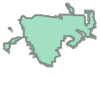

In [64]:
california_geodata['geometry'][4]

In [66]:
test_df = california_geodata[["Poverty Rate","geometry"]]

In [67]:
test_df

,Poverty Rate,geometry
0,23.045039,"(POLYGON ((-118.963713 35.595182, -118.960574 ..."
1,15.812540,"POLYGON ((-119.268089 34.47578, -119.266678 34..."
2,8.862177,"POLYGON ((-121.563805 36.49934, -121.554078 36..."
3,34.332282,"POLYGON ((-119.233867 36.38523, -119.233662 36..."
4,26.859584,"(POLYGON ((-120.794441 36.893821, -120.781957 ..."
...,...,...
1546,20.903955,"POLYGON ((-118.520199 35.590619, -118.517176 3..."
1547,26.139621,"POLYGON ((-117.454468 33.791972, -117.453958 3..."
1548,14.232509,"(POLYGON ((-118.291644 34.063683, -118.289914 ..."
1549,24.818928,"POLYGON ((-119.448018 35.500528, -119.439288 3..."


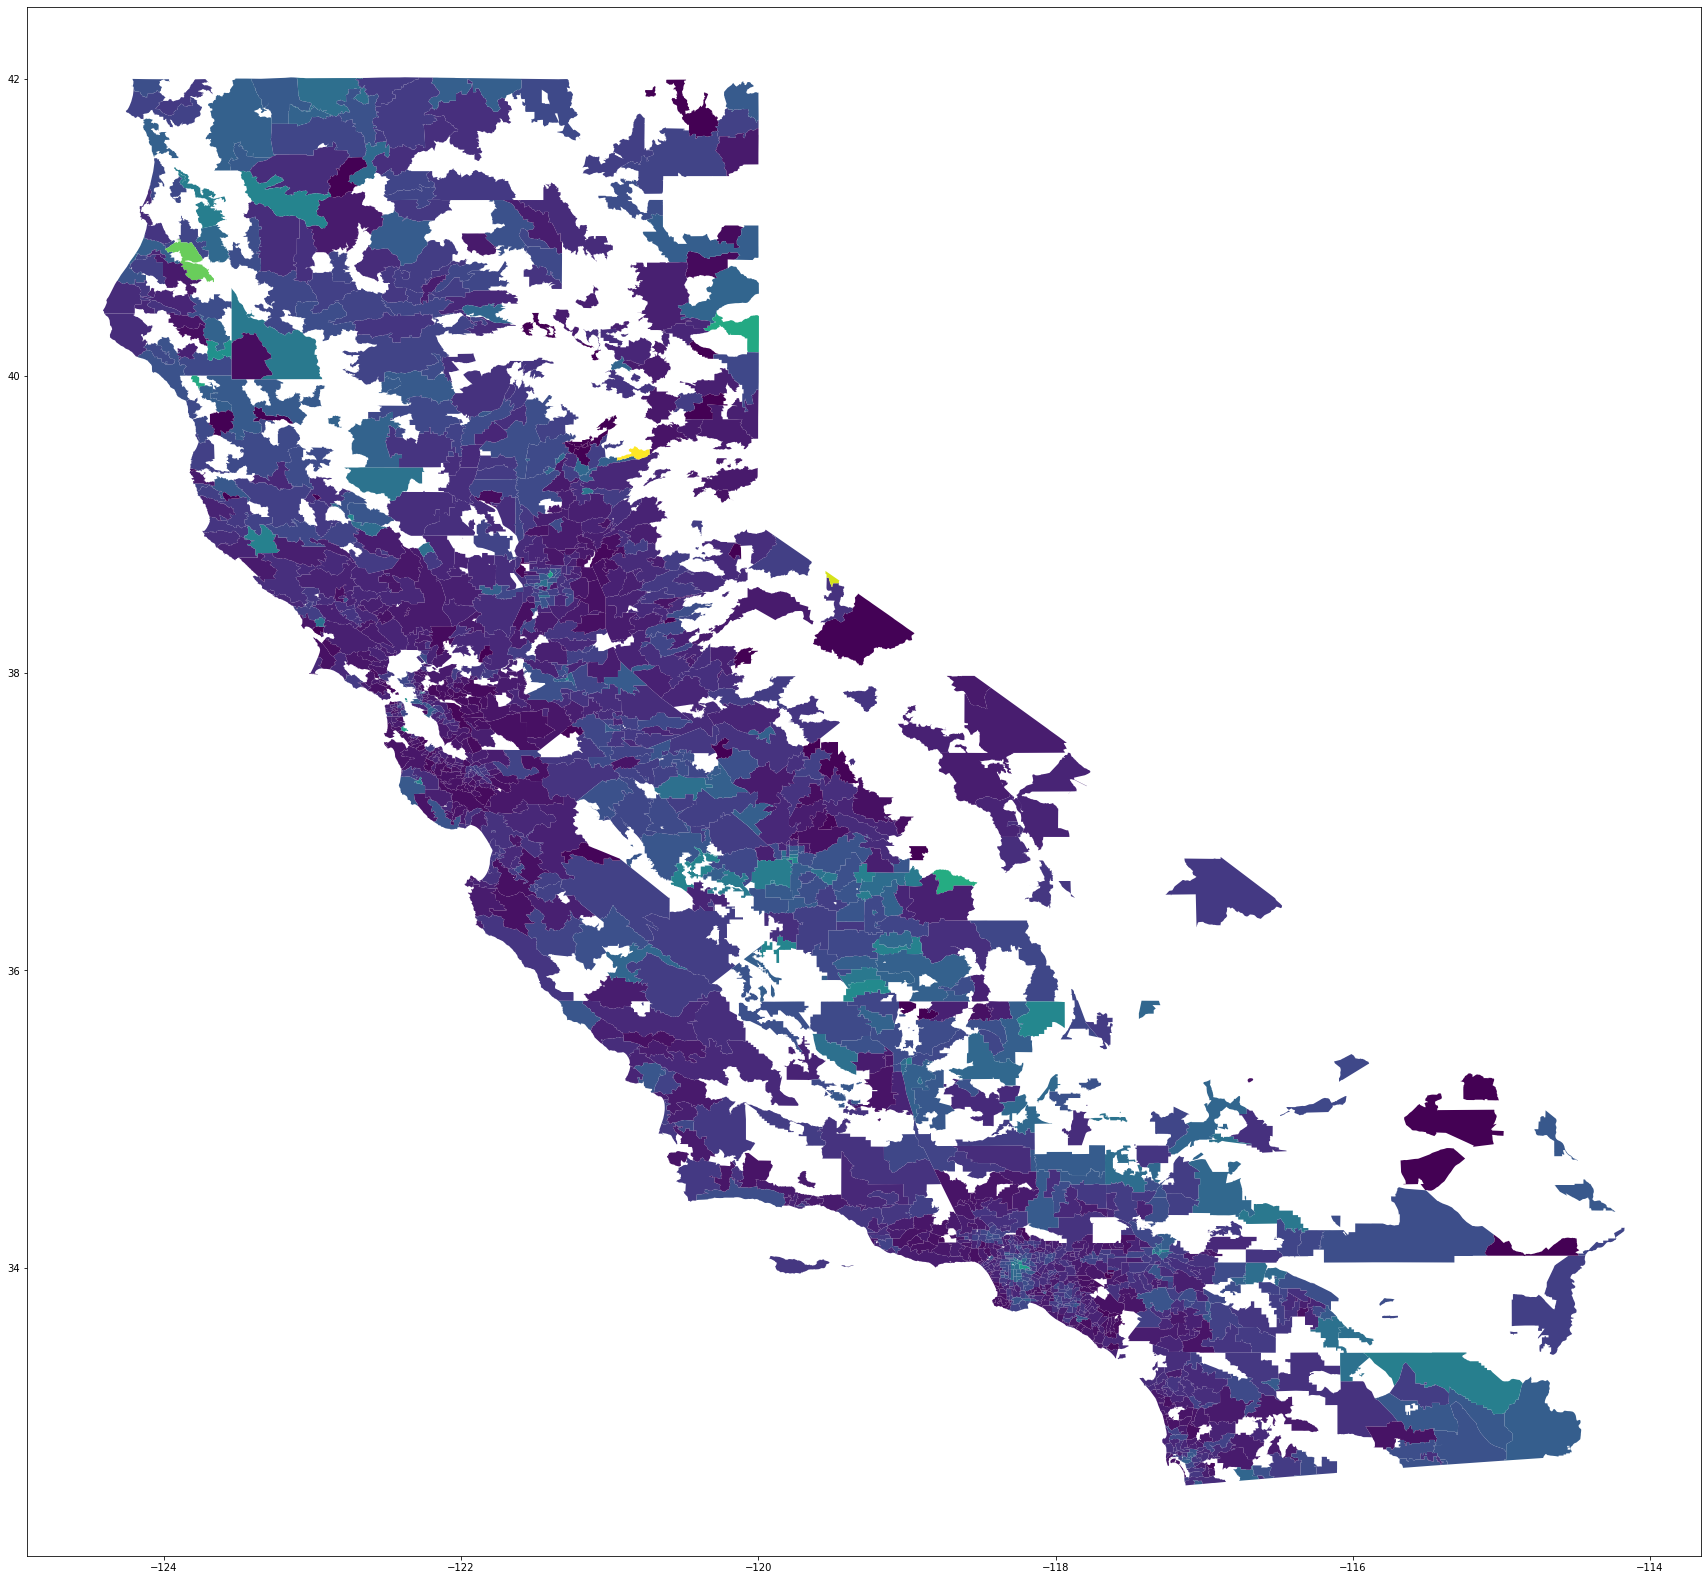

In [78]:
test_df.plot(figsize=(30,30), column='Poverty Rate')
# colorscale = [
#     'rgb(193, 193, 193)',
#     'rgb(239,239,239)',
#     'rgb(195, 196, 222)',
#     'rgb(144,148,194)',
#     'rgb(101,104,168)',
#     'rgb(65, 53, 132)']

# values = df_sample_r['TOT_POP'].tolist()
# fips = df_sample_r['FIPS'].tolist()

# endpts = list(np.mgrid[min(values):max(values):4j])
# colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
#               "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
# fig = ff.create_choropleth(
#     fips=fips, values=values, scope=['California'], show_state_data=True,
#     colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
#     legend_title='Population by County',
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     exponent_format=True,
# )
# fig.layout.template = None
# fig.show()

In [16]:
# Saving a CSV file named "california_merged_data"

california_merged.to_csv("Resources/california_merged_data.csv", encoding="utf-8", index=False)

In [55]:
import plotly.figure_factory as ff
import geopandas as gp
# df = gp.read_file("/Users/jackparmer/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")

# import numpy as np
# import pandas as pd

df_f = gp.read_file('Resources/california_census_data.csv')

In [52]:
# Problem - Geometry coordinates were knocked off

df_f.head(20)

,Population,Poverty Count,poverty_male,poverty_female,poverty_white_alone,poverty_black_alone,population_american_indian_alone,poverty_asian_alone,poverty_native_hawaiian_alone,poverty_two_or_more_races,...,employment_not_labor_force,employment_employed,employment_unemployed,Zipcode,Poverty Rate,index,City,County,Type,geometry
0,58738.0,18654.0,8736.0,9918.0,5512.0,1982.0,57.0,24.0,0.0,182.0,...,16142.0,23182.0,2922.0,90001,31.757976097245393,1,Los Angeles,Los Angeles,Standard,None
1,52856.0,17795.0,7735.0,10060.0,6049.0,3905.0,270.0,110.0,0.0,249.0,...,16206.0,18957.0,2660.0,90002,33.666944150143784,2,Los Angeles,Los Angeles,Standard,None
2,70490.0,23212.0,10498.0,12714.0,5133.0,6757.0,241.0,28.0,0.0,253.0,...,19607.0,26755.0,3835.0,90003,32.92949354518371,3,Los Angeles,Los Angeles,Standard,None
3,62733.0,11985.0,5475.0,6510.0,5027.0,643.0,34.0,2403.0,0.0,225.0,...,15009.0,34265.0,2624.0,90004,19.10477738989049,4,Los Angeles,Los Angeles,Standard,None
4,39562.0,11300.0,4979.0,6321.0,2302.0,815.0,44.0,2798.0,0.0,131.0,...,9063.0,21430.0,2040.0,90005,28.562762246600272,5,Los Angeles,Los Angeles,Standard,None
5,62329.0,17720.0,8223.0,9497.0,5404.0,603.0,270.0,1933.0,9.0,271.0,...,14334.0,31431.0,3413.0,90006,28.429783888719538,6,Los Angeles,Los Angeles,Standard,None
6,41221.0,16513.0,7917.0,8596.0,4486.0,1731.0,85.0,4717.0,127.0,485.0,...,16933.0,16373.0,2426.0,90007,40.059678319303266,7,Los Angeles,Los Angeles,Standard,None
7,32359.0,7207.0,2945.0,4262.0,1492.0,4755.0,0.0,177.0,35.0,160.0,...,10795.0,14512.0,1792.0,90008,22.272010877962853,8,Los Angeles,Los Angeles,Standard,None
8,3759.0,535.0,283.0,252.0,51.0,15.0,0.0,398.0,0.0,10.0,...,1285.0,2084.0,179.0,90010,14.232508645916468,10,Los Angeles,Los Angeles,Standard,None
9,108051.0,38839.0,17507.0,21332.0,14461.0,3584.0,344.0,121.0,16.0,218.0,...,28309.0,44628.0,3954.0,90011,35.94506297951893,11,Los Angeles,Los Angeles,Standard,None


In [47]:
type(df_f["geometry"])

geopandas.geoseries.GeoSeries

In [19]:
df_f['geometry']

# df_f["Zipcode"]['90242']

0       None
1       None
2       None
3       None
4       None
        ... 
1546    None
1547    None
1548    None
1549    None
1550    None
Name: geometry, Length: 1551, dtype: object

In [20]:
type(df_f)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

# df_sample = pd.read_shp('cb_2018_us_zcta510_500k.shp')
# df_sample_r = df_sample[df_sample['STNAME'] == 'California']

# values = df_sample_r['TOT_POP'].tolist()
# fips = df_sample_r['FIPS'].tolist()

# endpts = list(np.mgrid[min(values):max(values):4j])
# colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
#               "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
# fig = ff.create_choropleth(
#     fips=fips, values=values, scope=['California'], show_state_data=True,
#     colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
#     legend_title='Population by County',
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     exponent_format=True,
# )
# fig.layout.template = None
# fig.show()